In [2]:
import pandas as pd
import matplotlib.pyplot as plt
dpi = 200
plt.rcParams['figure.dpi'] = dpi
plt.rcParams['savefig.dpi'] = dpi
# plt.style.use(['science','ieee', 'scatter'])
plt.rcParams['figure.figsize'] = 5,5

import numpy as np

In [3]:
%config InlineBackend.figure_format = 'svg'

In [4]:
%%html
<style>
.output_svg div{
  width: 100% !important;
  height: 100% !important;
}
</style>

In [5]:
csv = ['obs.txt']
titles = ['obs']

In [6]:
obs = pd.read_csv(csv[0], header=0, sep = '\t')

obs

,cloud_name,cloud_dir,b_dir_planck,b_dir_optical,mcf_slope,sfr_4,sfr_3
0,Lupus-1,-1,86.0,-82.0,0.188,4.00,0.63
1,Cha-I-III,22,-76.0,NaN,0.165,NaN,1.03
2,Pipe,-45,59.0,49.0,0.165,2.81,NaN
3,IC5146,-38,67.0,64.0,0.231,NaN,0.38
4,Taurus,75,1.0,0.0,0.176,4.76,0.14
5,Musca,27,-82.0,NaN,0.195,NaN,0.90
6,Perseus,32,-84.0,59.0,0.206,7.98,1.46
7,Orion B,-30,-87.0,7.0,0.132,2.19,NaN
8,Orion A,83,59.0,7.0,0.159,5.21,NaN
9,Ophiuchus,-45,-81.0,-65.0,0.096,6.10,2.32


In [7]:
obs['b_offset_planck'] = np.abs(obs[obs.keys()[2]] - obs[obs.keys()[1]])
obs['b_offset_optical'] = np.abs(obs[obs.keys()[3]] - obs[obs.keys()[1]])

obs.loc[obs['b_offset_planck'] > 90, 'b_offset_planck'] = 180 - obs.loc[obs['b_offset_planck'] > 90, 'b_offset_planck'] 
obs.loc[obs['b_offset_optical'] > 90, 'b_offset_optical'] = 180 - obs.loc[obs['b_offset_optical'] > 90, 'b_offset_optical'] 

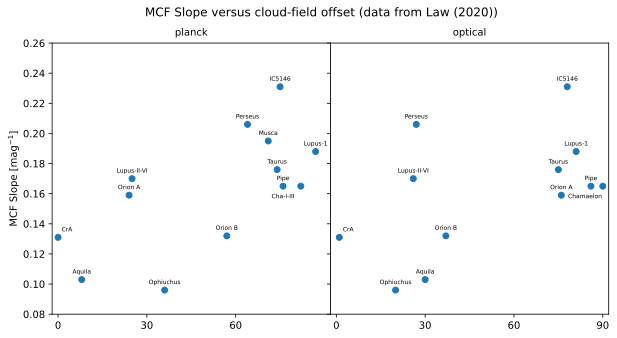

In [34]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5), sharey = True)

names = ['planck', 'optical']

for i, name in enumerate(names):
    ax[i].scatter(obs[f'b_offset_{name}'], obs['mcf_slope'])

    for j, row in obs.iterrows():
        if ~np.isnan(row[f'b_offset_{name}']) and ~np.isnan(row[f'mcf_slope']):
            
            x = row[f'b_offset_{name}']
            y = row['mcf_slope'] + 0.004
            
            if row['cloud_name'] == 'Chamaelon' or row['cloud_name'] == 'Cha-I-III':
                y -= 0.012
                x -= 6
            
            if x < 4:
                x += 3
            
            ax[i].text(x, y, s = row['cloud_name'], fontsize = 6, ha = 'center')

    ax[i].text(45, 0.265, s = name, ha = 'center', fontsize = 10)
    ax[i].set_xlim(-2, 92)
    ax[i].set_ylim(0.08, 0.26)
    
ax[0].set_xticks([0, 30, 60])
ax[1].set_xticks([0, 30, 60, 90])
ax[0].set_ylabel(r'MCF Slope [mag$^{-1}$]')
fig.suptitle('MCF Slope versus cloud-field offset (data from Law (2020))')
plt.subplots_adjust(wspace = 0)
plt.savefig('../images/obs_mcf_slope.png', dpi = 600)
plt.show()


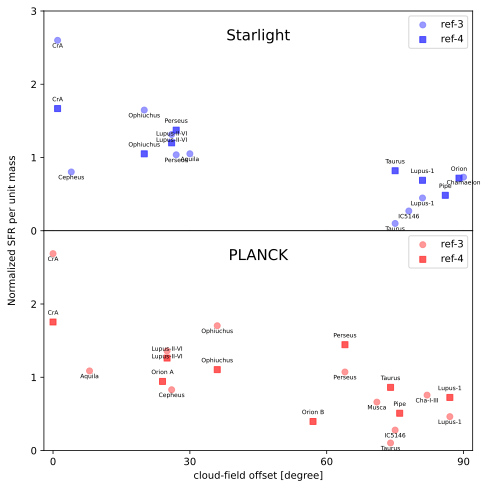

In [35]:
fig, ax = plt.subplots(2, 1, figsize = (7, 7), sharex = True)

criteria = np.logical_and(obs['cloud_name'] != 'Orion A', obs['cloud_name'] != 'Orion B')


clds = obs[f'cloud_name'][criteria]
x = obs[f'b_offset_optical'][criteria]
y1 = obs[f'sfr_3'][criteria]
y2 = obs[f'sfr_4'][criteria]

criteria1 = np.logical_and(~np.isnan(x), ~np.isnan(y1))
criteria2 = np.logical_and(~np.isnan(x), ~np.isnan(y2))

x1 = x[criteria1]
y1 = y1[criteria1]
x2 = x[criteria2]
y2 = y2[criteria2]

y1 /= np.nanmean(y1)
y2 /= np.nanmean(y2)


# ax[0].scatter(x = obs[f'b_offset_optical'][criteria], y  =obs[f'sfr_comb'][criteria], color = 'green', alpha = 0.5, s = 200)
ax[0].scatter(x1, y1, marker = 'o', c = [[0.5,0.5,1,.8] for i in range(len(x1))], label = 'ref-3')
ax[0].scatter(x2, y2, marker = 's', c = [[0.2,0.2,1,.8] for i in range(len(x2))], label = 'ref-4')


for i in x.keys():
    if i in x1.keys():
        ax[0].text(x1[i], y1[i]-0.1, s = clds [i], fontsize = 6, ha = 'center', color = [0,0,0,1])
    if i in x2.keys():
        ax[0].text(x2[i], y2[i]+0.1, s = clds [i], fontsize = 6, ha = 'center', color = [0,0,0,1])


# ax[0].hlines(np.mean(y1[x1 < 45]),0, 45, color = [0.5,0.5,1,.8], lw = 1)
# ax[0].hlines(np.mean(y1[x1 > 45]),45, 90, color = [0.5,0.5,1,.8], lw = 1, label = f'ref 3, diff = {np.mean(y1[x1 > 45]) - np.mean(y1[x1 < 45]):.2f}')
# ax[0].hlines(np.mean(y2[x2 < 45]),0, 45, color = [0.2,0.2,1,.8], lw = 1)
# ax[0].hlines(np.mean(y2[x2 > 45]),45, 90, color = [0.2,0.2,1,.8], lw = 1, label = f'ref 4, diff = {np.mean(y2[x2 > 45]) - np.mean(y2[x2 < 45]):.2f}')


x = obs[f'b_offset_planck']
clds = obs[f'cloud_name']
y1 = obs[f'sfr_3']
y2 = obs[f'sfr_4']

criteria1 = np.logical_and(~np.isnan(x), ~np.isnan(y1))
criteria2 = np.logical_and(~np.isnan(x), ~np.isnan(y2))

x1 =  x[criteria1]
y1 = y1[criteria1]
x2 =  x[criteria2]
y2 = y2[criteria2]

y1 /= np.nanmean(y1)
y2 /= np.nanmean(y2)

# ax[1].scatter(x = obs[f'b_offset_planck'], y = obs[f'sfr_comb'], color = 'green', s = 100, alpha = 0.5)
ax[1].scatter(x1, y1, marker = 'o', c = [[1,0.5,0.5,.8] for i in range(len(x1))], label = 'ref-3')
ax[1].scatter(x2, y2, marker = 's', c = [[1,0.2,0.2,.8] for i in range(len(x2))], label = 'ref-4')

for i in x.keys():
    if i in x1.keys():
        ax[1].text(x1[i], y1[i]-0.1, s = clds [i], fontsize = 6, ha = 'center', color = [0,0,0,1])
    if i in x2.keys():
        ax[1].text(x2[i], y2[i]+0.1, s = clds [i], fontsize = 6, ha = 'center', color = [0,0,0,1])

# ax[1].hlines(np.mean(y1[x1 < 45]),0, 45, color = [1,0.5,0.5,.8], lw = 1)
# ax[1].hlines(np.mean(y1[x1 > 45]),45, 90, color = [1,0.5,0.5,.8], lw = 1, label = f'ref 3, diff = {np.mean(y1[x1 > 45]) - np.mean(y1[x1 < 45]):.2f}')
# ax[1].hlines(np.mean(y2[x2 < 45]),0, 45, color = [1,0.2,0.2,.8], lw = 1)
# ax[1].hlines(np.mean(y2[x2 > 45]),45, 90, color = [1,0.2,0.2,.8], lw = 1, label = f'ref 4, diff = {np.mean(y2[x2 > 45]) - np.mean(y2[x2 < 45]):.2f}')


for i in ax:
    i.set_ylim(0, 3)
    i.set_xlim(-2, 92)
    i.legend()

ax[0].text(45, 2.6, "Starlight", ha = 'center', fontsize = 15)
ax[1].text(45, 2.6, "PLANCK", ha = 'center', fontsize = 15)


ax[0].set_yticks([0, 1, 2, 3])
ax[1].set_yticks([0, 1, 2])
ax[1].set_xticks([0, 30, 60, 90])

fig.add_subplot(111, frameon=False)
plt.tight_layout()
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

plt.xlabel('cloud-field offset [degree]')
plt.ylabel('Normalized SFR per unit mass')
plt.subplots_adjust(hspace = 0)
plt.savefig('../images/obs_sfr_per_mass.png')
plt.show()


In [10]:
# combine data from SFR ref 3 and ref 4

obs['sfr_4_norm'] = obs['sfr_4'] / np.mean(obs['sfr_4'])
obs['sfr_3_norm'] = obs['sfr_3'] / np.mean(obs['sfr_3'])

obs['sfr_comb'] = np.nanmean([obs['sfr_4_norm'], obs['sfr_3_norm']], axis=0)

In [13]:
planck_table = obs[['cloud_name', 'b_offset_planck','mcf_slope','sfr_comb']][
    ~np.isnan(obs['mcf_slope']) & ~np.isnan(obs['mcf_slope']) & ~np.isnan(obs['b_offset_planck'])].copy()

planck_table = planck_table.rename(columns={'b_offset_planck': 'b_offset'})
planck_table

,cloud_name,b_offset,mcf_slope,sfr_comb
0,Lupus-1,87.0,0.188,0.607298
1,Cha-I-III,82.0,0.165,0.772017
2,Pipe,76.0,0.165,0.521529
3,IC5146,75.0,0.231,0.284822
4,Taurus,74.0,0.176,0.494190
5,Musca,71.0,0.195,0.674578
6,Perseus,64.0,0.206,1.287693
7,Orion B,57.0,0.132,0.406459
8,Orion A,24.0,0.159,0.966964
9,Ophiuchus,36.0,0.096,1.435529


In [14]:
optical_table = obs[['cloud_name', 'b_offset_optical', 'mcf_slope', 'sfr_comb']][
    ~np.isnan(obs['mcf_slope']) & ~np.isnan(obs['mcf_slope']) & ~np.isnan(obs['b_offset_optical'])].copy()

optical_table = optical_table.rename(columns={'b_offset_optical': 'b_offset'})
optical_table

,cloud_name,b_offset,mcf_slope,sfr_comb
0,Lupus-1,81.0,0.188,0.607298
2,Pipe,86.0,0.165,0.521529
3,IC5146,78.0,0.231,0.284822
4,Taurus,75.0,0.176,0.494190
6,Perseus,27.0,0.206,1.287693
7,Orion B,37.0,0.132,0.406459
8,Orion A,76.0,0.159,0.966964
9,Ophiuchus,20.0,0.096,1.435529
10,Lupus-II-VI,26.0,0.170,1.340124
11,Aquila,30.0,0.103,1.109307


In [15]:
def error_propagate(a, b, c):
    var_a = np.std(a)**2/a.size
    var_b = np.std(b)**2/b.size
    var_c = np.std(c)**2/c.size
    
    mean_a = np.mean(a)
    mean_b = np.mean(b)
    mean_c = np.mean(c)

    A = (1/mean_c)**2 * var_a
    B = (1/mean_c)**2 * var_b
    C = ((mean_b - mean_a)/mean_c)**2 * var_c
    
    return np.sqrt(A + B + C)

In [25]:
relative_mcf_different_planck = (np.mean(planck_table['mcf_slope'][planck_table['b_offset'] > 45]) -
                                 np.mean(planck_table['mcf_slope'][planck_table['b_offset'] < 45])) / np.mean(planck_table['mcf_slope'])

relative_mcf_different_planck_err = error_propagate(
    planck_table['mcf_slope'][planck_table['b_offset'] < 45],
    planck_table['mcf_slope'][planck_table['b_offset'] > 45],
    planck_table['mcf_slope'])


relative_mcf_different_optical = (np.mean(optical_table['mcf_slope'][optical_table['b_offset'] > 45]) -
                                  np.mean(optical_table['mcf_slope'][optical_table['b_offset'] < 45])) / np.mean(optical_table['mcf_slope'])

relative_mcf_different_optical_err = error_propagate(
    optical_table['mcf_slope'][optical_table['b_offset'] < 45],
    optical_table['mcf_slope'][optical_table['b_offset'] > 45],
    optical_table['mcf_slope'])

print(f"Relative MCF slope different for plancks data: {relative_mcf_different_planck:25.20f} +- {relative_mcf_different_planck_err:25.20f}")
print(f"Relative MCF slope different for optical data: {relative_mcf_different_optical:25.20f} +- {relative_mcf_different_optical_err:25.20f}")


Relative MCF slope different for plancks data:    0.30980160604629208843 +-    0.10110408944998323932
Relative MCF slope different for optical data:    0.25598335067637884022 +-    0.11532147170719482532


In [26]:
relative_sfe_different_planck = (np.mean(planck_table['sfr_comb'][planck_table['b_offset'] > 45]) - \
    np.mean(planck_table['sfr_comb'][planck_table['b_offset'] < 45])) / np.mean(planck_table['sfr_comb'])

relative_sfe_different_planck_err = error_propagate(
    planck_table['sfr_comb'][planck_table['b_offset'] < 45],
    planck_table['sfr_comb'][planck_table['b_offset'] > 45],
    planck_table['sfr_comb'])

relative_sfe_different_optical = (np.mean(optical_table['sfr_comb'][optical_table['b_offset'] > 45]) - \
    np.mean(optical_table['sfr_comb'][optical_table['b_offset'] < 45])) / np.mean(optical_table['sfr_comb'])

relative_sfe_different_optical_err = error_propagate(
    optical_table['sfr_comb'][optical_table['b_offset'] < 45],
    optical_table['sfr_comb'][optical_table['b_offset'] > 45],
    optical_table['sfr_comb'])

print(f"Relative SFE different for plancks data: {relative_sfe_different_planck:.20f} +- {relative_sfe_different_planck_err:.20f}")
print(f"Relative SFE different for optical data: {relative_sfe_different_optical:.20f} +- {relative_sfe_different_optical_err:.20f}")


Relative SFE different for plancks data: -0.84750463013795462874 +- 0.27234865847532124805
Relative SFE different for optical data: -0.73118733558613902002 +- 0.27578346005628745496
